# Summary on available functions

(Just for help)

Mathematical functions:
* deriv(xx_tab, ff_tab)
* integral(xx_tab, ff_tab, F0=0.0)

Useful Python functions
* fill_list_series(value_0, value_max, delta_value)
* calc_func_list(value_list, func)
* find_ind(tab, value)
* find_max_ind(tab)
* find_min_ind(tab)

1D:
Displacement and distance covered:
* calc_displacement_1D(x_tab)
* calc_distance_covered_1D(x_tab)

2D:
* calc_abs_2D(xc_tab, yc_tab)
* calc_displacement_2D(x_tab, y_tab)
* calc_distance_covered_2D(x_tab, y_tab)

In [ ]:
!wget https://github.com/zoldbirka/colab-eng-phys/raw/refs/heads/main/twodkinematics.py
# Make sure twodkinematics.py is downloaded and copied next to this file!
# Or copy all functions from template-kinem-2d.ipynb at the start!

In [32]:
# importing modules
import math   # math functions
import matplotlib.pyplot as plt  # graph plot
%matplotlib inline

## Solution with pre written 'kinematics.py'
from twodkinematics import*

# 2D Examples

## Ball motion with no air resistance

Problem:

We throw a ball from a $h=20$ m height building with initial speed of $v_0=18$ m/s and inital angle (form the horizontal direction) of $\alpha=16$° .

* Where will the ball hit the ground?
* What will be the impact speed?
* How long did it take to reach the ground?
* What was the maximum height of this ball during the motion?
* What is the path length from the start to the impact?
* If there is another building at 25 m distance, where will the ball hit it?

## Zeroth step: set the coordinate system

Origin on the ground below the start point.

x points horizontally in the direction of initial velocity.

y point upwards.

## First step: calculate $x(t)$ and $y(t)$

In [33]:
# input data as variables
v0 = 18.0    #m/s
alpha_deg = 16.0
h = 20.0     #m

g = 9.81     #m/s^2

In [34]:
# calculating initial velocity components
alpha = math.radians(alpha_deg)
vx0 = v0*math.cos(alpha)
vy0 = v0*math.sin(alpha)
# initial position components
x0 = 0.0
y0 = h

In [35]:
# my x(t) and y(t) functions 
def my_xt(t):
    return vx0 * t

def my_yt(t):
    return y0 + vy0*t -g/2*t**2

In [36]:
# Let's define the time values:
t_tab = fill_list_series(0.0, 5.0, 0.001)  #fill_list_series() see in 'twodkinematics.py'
N = len(t_tab) # Number of time values

# t_max=5.0 is a guess. Maybe, we have to increase it, if the body did not touch the ground.

In [37]:
# Let's calculate the x,y values (position components)
x_tab = calc_func_list(t_tab, my_xt)
y_tab = calc_func_list(t_tab, my_yt) 

In [38]:
# Let's calculate the vx, vy values (velocity components)
vx_tab = deriv(t_tab, x_tab)
vy_tab = deriv(t_tab, y_tab)

In [39]:
# Let's calculate ax, ay values 
ax_tab = deriv(t_tab, vx_tab)
ay_tab = deriv(t_tab, vy_tab)

#Note in this case we know ax = 0, and ay = -g !!!
# But usefull for plotting

In [40]:
# print some values to check
# Use the copy and change it intelligently

print("x:", x_tab[0:5])
print("y:", y_tab[0:5])
print("vx:", vx_tab[0:5])
print("vy:", vy_tab[0:5])

x: [0.0, 0.01730271052688974, 0.03460542105377948, 0.051908131580669224, 0.06921084210755896]
y: [20.0, 20.004956567404705, 20.00990332480941, 20.01484027221412, 20.019767409618826]
vx: [17.30271052688974, 17.30271052688974, 17.302710526889744, 17.30271052688974, 17.302710526889737]
vy: [4.961472404703571, 4.951662404705459, 4.9418524047073475, 4.93204240470746, 4.922232404705795]


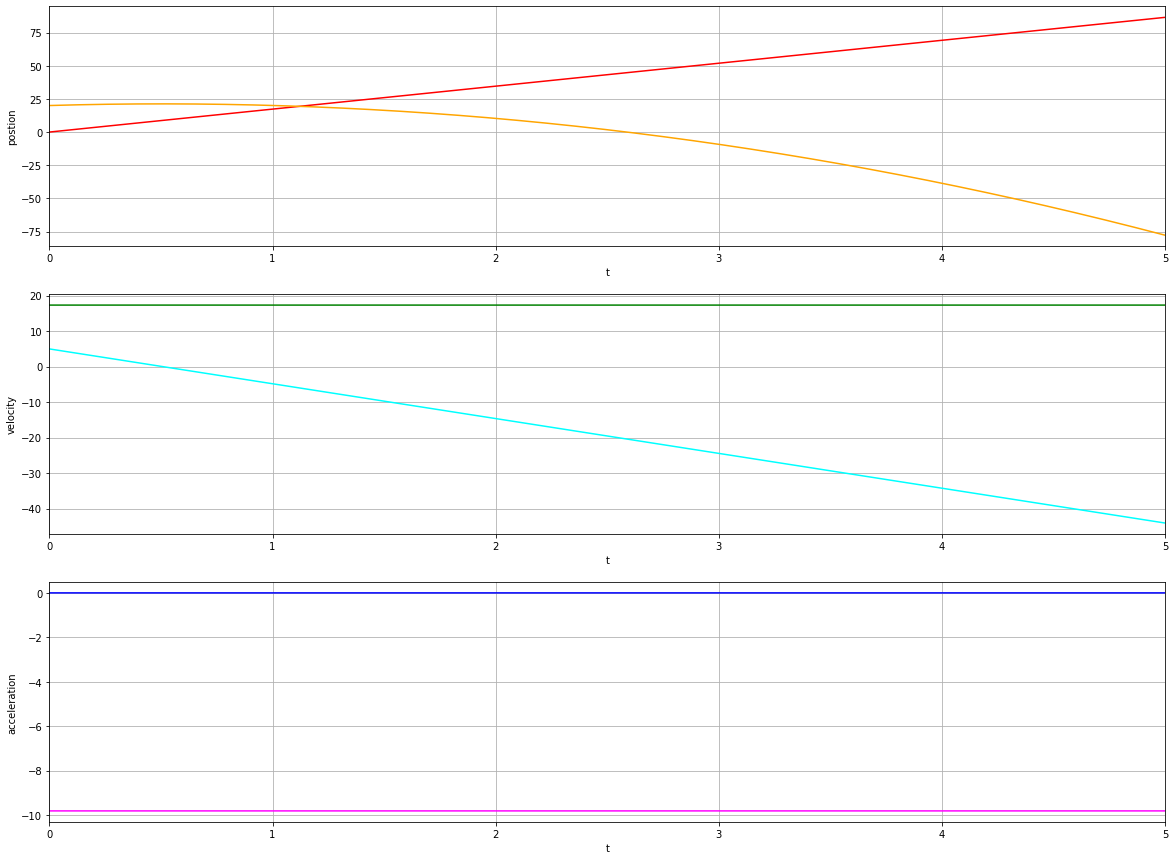

In [41]:
# It is a simple example of plotting. 
# Use the copy of it and change intelligently to plot what you want. 
# Sometimes just putting and deleting '#' character for deactivating or activating sepcific parts is enough

t_range=[0.0, 5.0]    # for a specific range. PLAY WITH END TIME!

# initialize plot routine
fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(311) 
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

# setting of horizontal axes
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("t") # set the label
    ax.set_xlim(t_range) # set the min and max values; comment it out if neccessary
    ax.grid()    # draw a grey grid 

# content of graphs
ax1.set_ylabel("postion")
ax1.plot(t_tab, x_tab, color="red") # x(t) with red
ax1.plot(t_tab, y_tab, color="orange") # y(t) with orange
ax2.set_ylabel("velocity")
ax2.plot(t_tab, vx_tab, color="green") # vx(t) with green
ax2.plot(t_tab, vy_tab, color="cyan") # vy(t) with cyan
ax3.set_ylabel("acceleration")
ax3.plot(t_tab, ax_tab, color="blue") # ax(t) with blue
ax3.plot(t_tab, ay_tab, color="magenta") # ay(t) with magenta

# plt.savefig(....)

Find the time, when the body touched the ground on the graph!

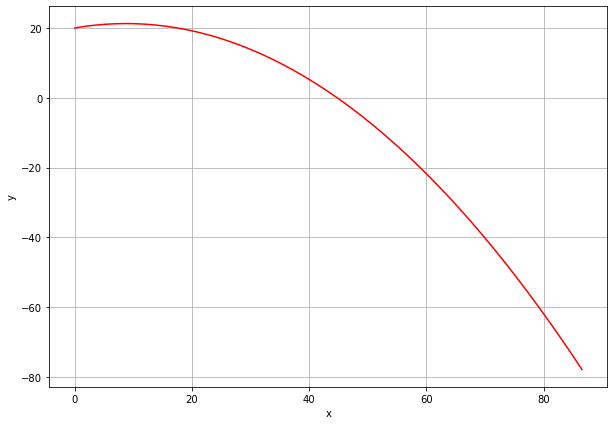

In [42]:
# Plot the path in x-y plane

fig = plt.figure(figsize=(10,7))  # plot size

# position of three sub-graphs
ax1 = fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x


## Where will the ball hit the ground?
## What will be the impact speed?
## How long did it take to reach the ground?

In [43]:
# find the meaning of "hit the ground:"
# y = 0 (in this coordinate system)

impact_ind = find_ind(y_tab, 0.0)

In [44]:
print("Number of solutions: %d"%len(impact_ind))

Number of solutions: 1


In [45]:
# calculating speed ie 2D absolute value of velocities 
vabs_tab = calc_abs_2D(vx_tab, vy_tab)

In [46]:
# print results
for i in range(len(impact_ind)):
    print("Solution #: %d"%i)
    # impact position: x at impact (y = 0)
    print("   x postion of the impact: %5.2f m"%x_tab[impact_ind[i]])
    # impact speed: vabs at impact 
    print("   speed     of the impact: %5.2f m/s"%vabs_tab[impact_ind[i]])
    # impact time: t at impact
    print("   time      of the impact: %5.2f s"%t_tab[impact_ind[i]])


Solution #: 0
   x postion of the impact: 44.76 m
   speed     of the impact: 26.76 m/s
   time      of the impact:  2.59 s


## What was the maximum height of this ball during the motion?

In [47]:
# maximum height = y has a maximum
maxheight_ind = find_max_ind(y_tab)

In [48]:
print("Maximum height: %5.2f m"%y_tab[maxheight_ind])

Maximum height: 21.25 m


In [49]:
# additional information:

print("Time    at maximum height: %5.2f s"%t_tab[maxheight_ind])
print("X-coord at maximum height: %5.2f m"%x_tab[maxheight_ind])
print("Speed   at maximum height: %5.2f m/s"%vabs_tab[maxheight_ind])

Time    at maximum height:  0.51 s
X-coord at maximum height:  8.76 m
Speed   at maximum height: 17.30 m/s


## What is the path length from the start to the impact?

In [51]:
# calculate distance covered - for 2D case!!

dist_tab = calc_distance_covered_2D(x_tab, y_tab)

In [52]:
print("Path length to the impact: %5.2f m"%(dist_tab[impact_ind[0]]))

Path length to the impact: 52.03 m


## If there is another building at 25 m distance, where will the ball hit it?

In [33]:
# other building: x = 25

In [53]:
otherbuilding_ind = find_ind(x_tab, 25.0)

print(otherbuilding_ind)

[1444]


In [54]:
# 1 solution! OK!

print("The ball will hit the other buildng at %5.2f m height."%(y_tab[otherbuilding_ind[0]]))

The ball will hit the other buildng at 16.94 m height.


# Other approach: start from acceleration

In [57]:
# input data as variables
v0 = 18.0    #m/s
alpha_deg = 16.0
h = 20.0     #m

g = 9.81     #m/s^2

In [58]:
# calculating initial velocity components
alpha = math.radians(alpha_deg)
vx0 = v0*math.cos(alpha)
vy0 = v0*math.sin(alpha)
# initial position components
x0 = 0.0
y0 = h

In [59]:
# my ax(t) and ay(t) functions
def my_axt(t):
    return 0.0

def my_ayt(t):
    return -g

In [60]:
# Let's define the time values:
# Use t2, a2, ... to not overwirite the prevoius results

t2_tab = fill_list_series(0.0, 5.0, 0.001)  # fill_list_series : see in 'twodkinematics.py'
N = len(t2_tab) # Number of time values

# calculate accelerations
ax2_tab = calc_func_list(t_tab, my_axt)   # calc_func_list : see in "twodkinematics.py'
ay2_tab = calc_func_list(t_tab, my_ayt) 

In [63]:
# a --> v --> x

vx2_tab = integral(t2_tab, ax2_tab, vx0)  # don't forget initial velocity!
vy2_tab = integral(t2_tab, ay2_tab, vy0)

x2_tab = integral(t2_tab, vx2_tab, x0)
y2_tab = integral(t2_tab, vy2_tab, y0)

In [64]:
# Theoretically x_tab = x2_tab, etc.

In [65]:
print(x_tab[100:110])
print(x2_tab[100:110])

[1.7302710526889742, 1.7475737632158639, 1.7648764737427536, 1.7821791842696433, 1.7994818947965332, 1.8167846053234227, 1.8340873158503124, 1.851390026377202, 1.868692736904092, 1.8859954474309817]
[1.7302710526889729, 1.7475737632158626, 1.7648764737427522, 1.782179184269642, 1.7994818947965316, 1.8167846053234211, 1.8340873158503108, 1.8513900263772005, 1.8686927369040902, 1.88599544743098]


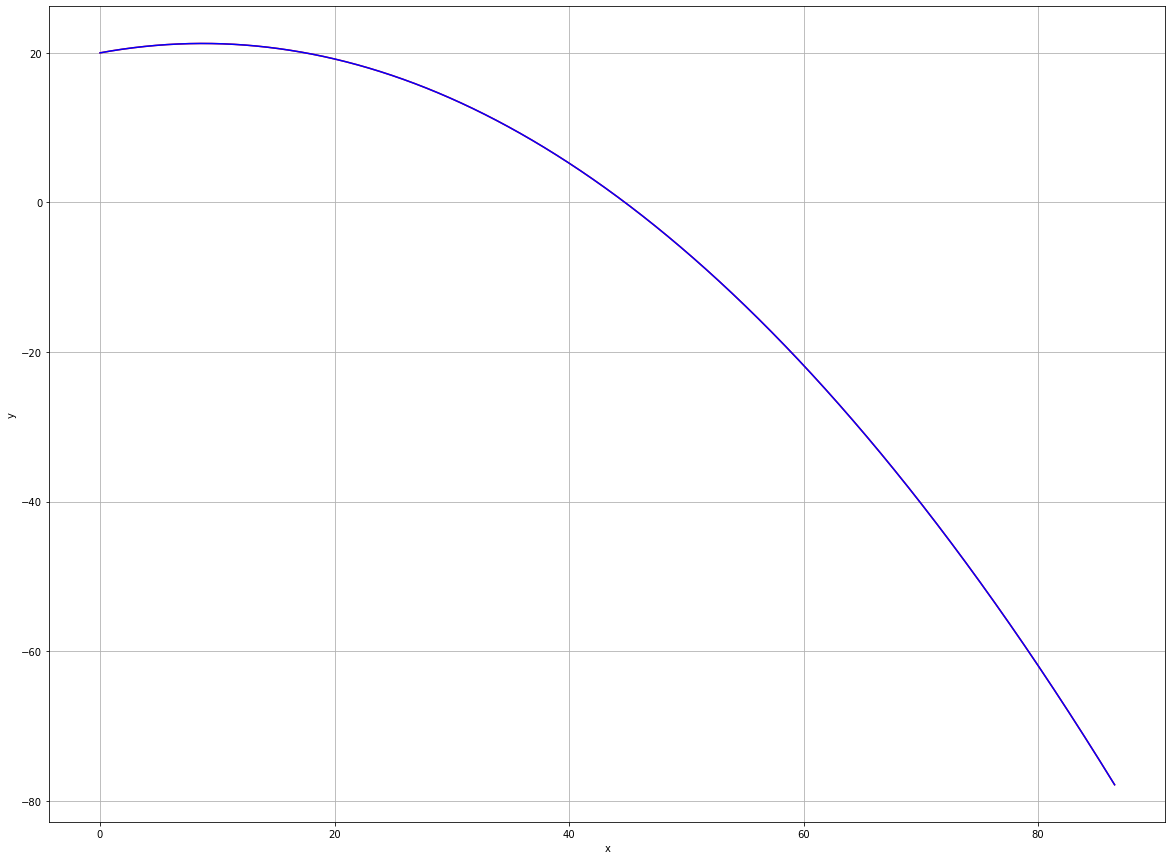

In [68]:
# Plot the two paths in x-y plane

fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x
ax1.plot(x2_tab, y2_tab, color="blue")   # plot y over x